In [1]:
import seaborn as sns
import pandas
import gripql
conn = gripql.Connection("https://bmeg.io/api", credential_file="bmeg_credentials.json")
O = conn.graph("bmeg_rc2")

Download gene expression values from TCGA-READ cohort and build matrix with submitter id as label

In [2]:
c = O.query().V("Project:TCGA-READ").out("cases").out("samples").as_("sample")
c = c.out("aliquots").out("gene_expressions").as_("exp")
c = c.render( ["$sample._data.gdc_attributes.submitter_id", "$exp._data.values"])

data = {}
for row in c.execute(stream=True):
    data[row[0]] = row[1]

[INFO]	2019-07-26 18:25:17,143	177 results received in 34 seconds


Take the data we downloaded and turn it into a Pandas data frame

In [8]:
samples = pandas.DataFrame(data).transpose().fillna(0.0)

Take a look at the top corner of the dataframe

In [9]:
samples.iloc[:5,:5]

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460
TCGA-AG-3883-01A,56.417170,0.532873,25.468040,1.398758,2.519876
TCGA-DC-6158-01A,213.685187,1.031829,151.992725,7.119824,8.481721
TCGA-EI-6507-01A,25.749271,0.000000,40.100776,7.127823,6.484232
TCGA-AF-3913-01A,254.599210,4.348810,119.589229,4.213013,7.268218
TCGA-EI-6883-01A,75.138424,0.406882,95.234971,5.180626,3.090609


Take a quick look to see the top expressing samples for the gene `ENSG00000000003`

In [3]:
samples["ENSG00000000003"].sort_values(ascending=False).head()

TCGA-DC-5869-01A    281.005900
TCGA-DC-6683-01A    258.010380
TCGA-AF-3913-01A    254.599210
TCGA-EF-5831-01A    253.774315
TCGA-DC-6157-01A    251.170374
Name: ENSG00000000003, dtype: float64

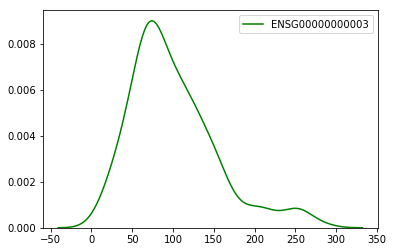

In [4]:
sns.kdeplot(samples['ENSG00000000003'], color="g")